In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('assets/FAOSTAT_data.csv')

In [3]:
df.head(2)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RT,Pesticides (trade),2,Afghanistan,5622,Import Value,1357,Pesticides,1971,1971,1000 US$,6.0,F,FAO estimate
1,RT,Pesticides (trade),2,Afghanistan,5622,Import Value,1357,Pesticides,1972,1972,1000 US$,6.0,F,FAO estimate


In [4]:
df['Domain Code'].value_counts()

RT    35824
Name: Domain Code, dtype: int64

In [5]:
del df['Domain Code']

In [6]:
df['Domain'].value_counts()

Pesticides (trade)    35824
Name: Domain, dtype: int64

In [7]:
del df['Domain']

In [8]:
print df['Element Code'].value_counts()
print df['Element'].value_counts()

5622    21455
5922    14369
Name: Element Code, dtype: int64
Import Value    21455
Export Value    14369
Name: Element, dtype: int64


In [9]:
del df['Element Code']

In [10]:
print df['Item Code'].value_counts()
print df['Item'].value_counts()

1357    15582
1416     5405
1419     5296
1418     4791
1417     4750
Name: Item Code, dtype: int64
Pesticides           15582
Insecticides          5405
Disinfectants,etc     5296
Herbicides            4791
Fungicides            4750
Name: Item, dtype: int64


In [11]:
del df['Item Code']

In [12]:
del df['Year Code']

In [13]:
df['Unit'].value_counts()

1000 US$    35824
Name: Unit, dtype: int64

In [14]:
del df['Unit']

In [15]:
print df['Flag'].value_counts()
print df['Flag Description'].value_counts()

W     32955
F      2045
Fm      777
I        46
w         1
Name: Flag, dtype: int64
Data reported on country official publications or web sites (Official) or trade country files                               32956
FAO estimate                                                                                                                 2045
Manual Estimation                                                                                                             777
Country data reported by International Organizations where the country is a member (Semi-official) - WTO, EU, UNSD, etc.       46
Name: Flag Description, dtype: int64


In [16]:
del df['Flag']

In [17]:
df.head(2)

,Area Code,Area,Element,Item,Year,Value,Flag Description
0,2,Afghanistan,Import Value,Pesticides,1971,6.0,FAO estimate
1,2,Afghanistan,Import Value,Pesticides,1972,6.0,FAO estimate


In [46]:
df_pest = df[df['Item'] == 'Pesticides']
df_pest = df_pest.reset_index(drop = True)

In [57]:
df_pest['Value'].ix[df_pest[(df_pest['Area'] == 'Canada') & (df_pest['Element'] == \
                    "Import Value") & (df_pest['Year'] == 1970)].index[0]]

19806.0

In [90]:
keys = []
values = []
for country in df_pest['Area'].value_counts().index:
    for year in range(1961, 2015):
        try:
            imp = df_pest['Value'].ix[df_pest[(df_pest['Area'] == country) & \
                    (df_pest['Element'] == "Import Value") & (df_pest['Year'] == year)]\
                    .index[0]]
            exp = df_pest['Value'].ix[df_pest[(df_pest['Area'] == country) & \
                    (df_pest['Element'] == "Export Value") & (df_pest['Year'] == year)]\
                    .index[0]]
            lil_key = [country, year]
            keys.append(lil_key)
            lil_value = [imp, exp]
            values.append(lil_value)
            
        except:
            pass
        
imp_exp = zip(keys, values)

In [63]:
def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

In [67]:
year_colors = []
for i in range(1961, 2015):
    lil_color = cm.seismic((i-1961)*256/(2015-1961))
    year_colors.append(lil_color)  
    
year_color = dict(zip(range(1961, 2015), year_colors))

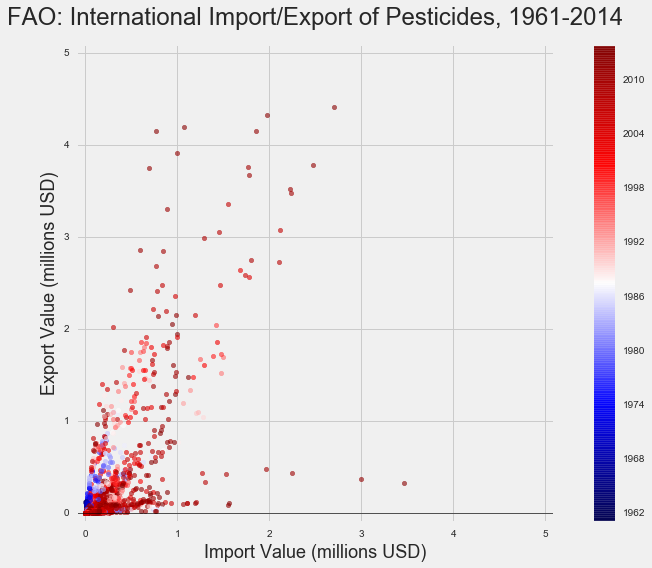

In [74]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

for i in range(len(imp_exp)):
    plt.scatter(imp_exp[i][1][0]/1000000, imp_exp[i][1][1]/1000000, \
                color = year_color[imp_exp[i][0][1]], s = 20, alpha = 0.6)
plt.axhline(0, color='black', alpha = 0.6, linewidth = 0.5)
plt.axvline(0, color='black', alpha = 0.6, linewidth = 0.5)
plt.title('FAO: International Import/Export of Pesticides, 1961-2014', fontsize = 24, y = 1.03)

# y label
plt.ylabel('Export Value (millions USD)', fontsize = 18)

# x label
plt.xlabel('Import Value (millions USD)', fontsize = 18)
#plt.xticks(range(0, 2018, 5), fontsize = 12)

plt.xlim([-0.1, 5.1])
plt.ylim([-0.1, 5.1])

img = plt.imshow(np.array([[1961,2014]]), cmap="seismic", alpha = 0.85)
img.set_visible(False)
plt.colorbar()


plt.show()

In [75]:
imp_exp[0]

(['Canada', 1961], [19647.0, 1310.0])

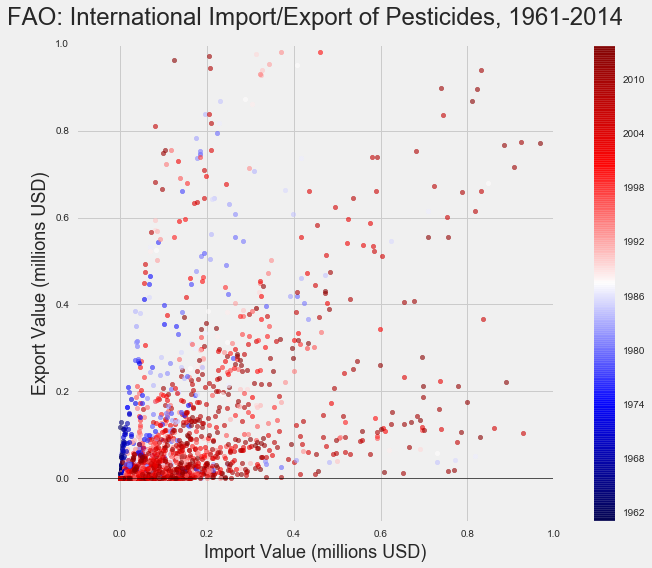

In [76]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

for i in range(len(imp_exp)):
    plt.scatter(imp_exp[i][1][0]/1000000, imp_exp[i][1][1]/1000000, \
                color = year_color[imp_exp[i][0][1]], s = 20, alpha = 0.6)
plt.axhline(0, color='black', alpha = 0.6, linewidth = 0.5)
plt.axvline(0, color='black', alpha = 0.6, linewidth = 0.5)
plt.title('FAO: International Import/Export of Pesticides, 1961-2014', fontsize = 24, y = 1.03)

# y label
plt.ylabel('Export Value (millions USD)', fontsize = 18)

# x label
plt.xlabel('Import Value (millions USD)', fontsize = 18)
#plt.xticks(range(0, 2018, 5), fontsize = 12)

plt.xlim([-0.1, 1])
plt.ylim([-0.1, 1])

img = plt.imshow(np.array([[1961,2014]]), cmap="seismic", alpha = 0.85)
img.set_visible(False)
plt.colorbar()


plt.show()

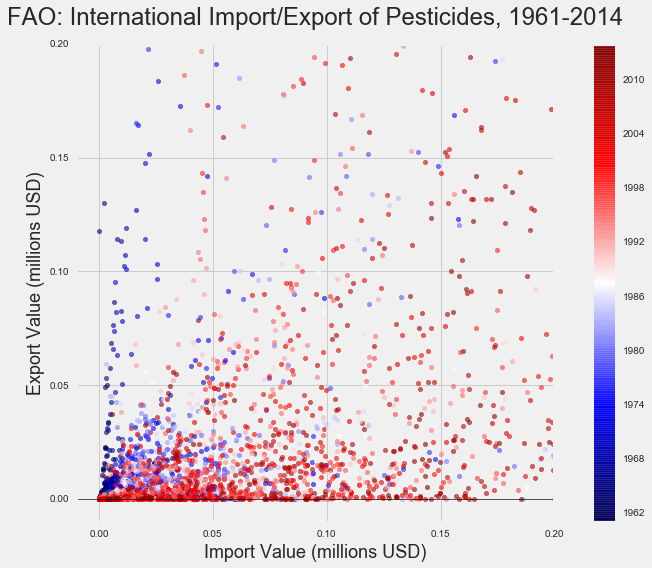

In [78]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

for i in range(len(imp_exp)):
    plt.scatter(imp_exp[i][1][0]/1000000, imp_exp[i][1][1]/1000000, \
                color = year_color[imp_exp[i][0][1]], s = 20, alpha = 0.6)
plt.axhline(0, color='black', alpha = 0.6, linewidth = 0.5)
plt.axvline(0, color='black', alpha = 0.6, linewidth = 0.5)
plt.title('FAO: International Import/Export of Pesticides, 1961-2014', fontsize = 24, y = 1.03)

# y label
plt.ylabel('Export Value (millions USD)', fontsize = 18)

# x label
plt.xlabel('Import Value (millions USD)', fontsize = 18)
#plt.xticks(range(0, 2018, 5), fontsize = 12)

plt.xlim([-0.01, 0.2])
plt.ylim([-0.01, 0.2])

img = plt.imshow(np.array([[1961,2014]]), cmap="seismic", alpha = 0.85)
img.set_visible(False)
plt.colorbar()


plt.show()

In [94]:
US = []
for i in range(len(imp_exp)):
    if imp_exp[i][0][0] == 'United States of America':
        US.append(imp_exp[i])

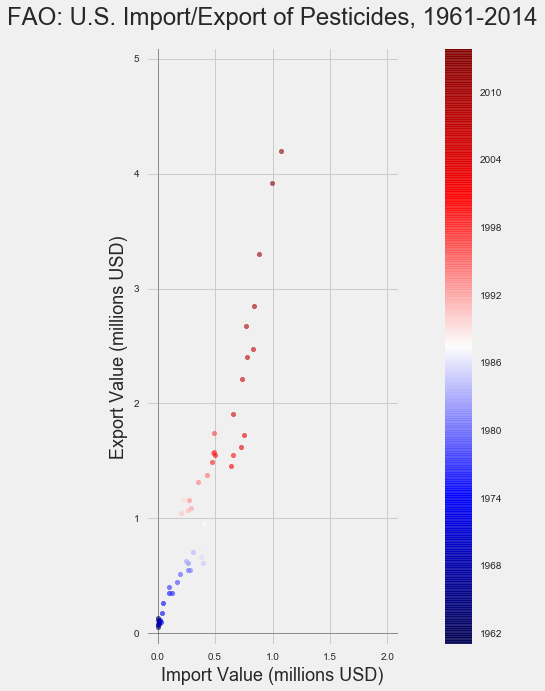

In [101]:
plt.figure(figsize=(14,10))
plt.style.use('fivethirtyeight')

for i in range(len(US)):
    plt.scatter(US[i][1][0]/1000000, US[i][1][1]/1000000, \
                color = year_color[US[i][0][1]], s = 20, alpha = 0.6)
plt.axhline(0, color='black', alpha = 0.6, linewidth = 0.5)
plt.axvline(0, color='black', alpha = 0.6, linewidth = 0.5)
plt.title('FAO: U.S. Import/Export of Pesticides, 1961-2014', fontsize = 24, y = 1.03)

# y label
plt.ylabel('Export Value (millions USD)', fontsize = 18)

# x label
plt.xlabel('Import Value (millions USD)', fontsize = 18)
#plt.xticks(range(0, 2018, 5), fontsize = 12)

plt.xlim([-0.1, 2.1])
plt.ylim([-0.1, 5.1])

img = plt.imshow(np.array([[1961,2014]]), cmap="seismic", alpha = 0.85)
img.set_visible(False)
plt.colorbar()


plt.show()

In [102]:
italy = []
for i in range(len(imp_exp)):
    if imp_exp[i][0][0] == 'Italy':
        italy.append(imp_exp[i])

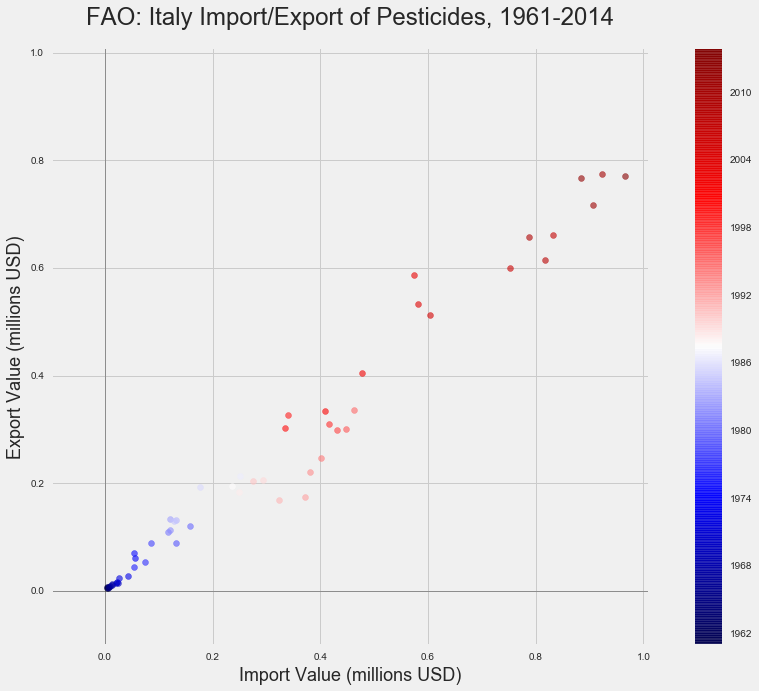

In [109]:
plt.figure(figsize=(14,10))
plt.style.use('fivethirtyeight')

for i in range(len(italy)):
    plt.scatter(italy[i][1][0]/1000000, italy[i][1][1]/1000000, \
                color = year_color[italy[i][0][1]], s = 35, alpha = 0.6)
plt.axhline(0, color='black', alpha = 0.6, linewidth = 0.5)
plt.axvline(0, color='black', alpha = 0.6, linewidth = 0.5)
plt.title('FAO: Italy Import/Export of Pesticides, 1961-2014', fontsize = 24, y = 1.03)

# y label
plt.ylabel('Export Value (millions USD)', fontsize = 18)

# x label
plt.xlabel('Import Value (millions USD)', fontsize = 18)
#plt.xticks(range(0, 2018, 5), fontsize = 12)

plt.xlim([-0.1, 1.01])
plt.ylim([-0.1, 1.01])

img = plt.imshow(np.array([[1961,2014]]), cmap="seismic", alpha = 0.85)
img.set_visible(False)
plt.colorbar()


plt.show()

In [113]:
Australia = []
for i in range(len(imp_exp)):
    if imp_exp[i][0][0] == 'Australia':
        Australia.append(imp_exp[i])

In [110]:
set(df['Area'])

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belgium-Luxembourg',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, Taiwan Province of',
 'China, mainland',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Czechoslovakia',
 "C\xc3\xb4te d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Re

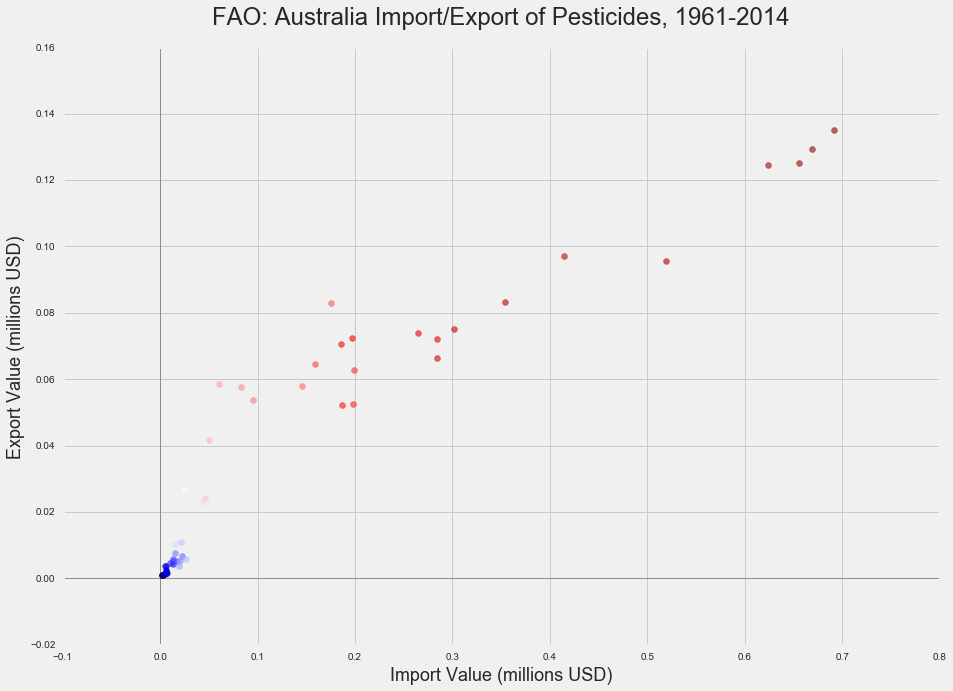

In [114]:
plt.figure(figsize=(14,10))
plt.style.use('fivethirtyeight')

for i in range(len(Australia)):
    plt.scatter(Australia[i][1][0]/1000000, Australia[i][1][1]/1000000, \
                color = year_color[Australia[i][0][1]], s = 35, alpha = 0.6)
plt.axhline(0, color='black', alpha = 0.6, linewidth = 0.5)
plt.axvline(0, color='black', alpha = 0.6, linewidth = 0.5)
plt.title('FAO: Australia Import/Export of Pesticides, 1961-2014', fontsize = 24, y = 1.03)

# y label
plt.ylabel('Export Value (millions USD)', fontsize = 18)

# x label
plt.xlabel('Import Value (millions USD)', fontsize = 18)
#plt.xticks(range(0, 2018, 5), fontsize = 12)

# plt.xlim([-0.1, 1.01])
# plt.ylim([-0.1, 1.01])

# img = plt.imshow(np.array([[1961,2014]]), cmap="seismic", alpha = 0.85)
# img.set_visible(False)
# plt.colorbar()


plt.show()